In [1]:
########## importing package #######################
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# loading train and test data 
#directory = "C:/Users/rahul/Documents/575/Project/"
directory = 'C:\\Users\\baban\\coursera\\575 ML project\\'
fifa_train = pd.read_csv(directory+"players_19.csv")
fifa_test = pd.read_csv(directory+"players_20.csv")
fifa_train.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Eng

In [3]:
fifa_train.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
count,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,1.777000e+04,17770.000000,17770.000000,17770.000000,17770.000000,1.625700e+04,17547.000000,17547.000000,1104.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,213797.776308,25.193922,181.253292,75.310917,66.240405,71.382949,2.440756e+06,9956.162071,1.117783,2.946427,2.346595,4.645685e+06,19.667408,2020.130507,12.143116,67.815319,52.248733,57.082172,62.267169,51.665484,64.972567,65.374622,62.931017,61.511078,66.149043,38.675730,63.088117
std,29955.746535,4.651957,6.745892,7.080013,6.994104,6.145171,5.644779e+06,22330.640048,0.401085,0.659353,0.749672,1.123030e+07,16.112007,1.300184,7.350035,11.329319,14.034645,10.589207,10.442659,16.347564,9.745859,7.807033,7.556389,7.667533,8.234898,10.420846,8.664458
min,164.000000,16.000000,154.000000,50.000000,47.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2018.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,30.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000
25%,199803.000000,21.000000,176.000000,70.000000,62.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,5.250000e+05,8.000000,2019.000000,6.000000,61.000000,42.000000,50.000000,57.000000,37.000000,59.000000,60.000000,58.000000,56.000000,60.000000,30.000000,57.000000
50%,221350.500000,25.000000,181.000000,75.000000,66.000000,71.000000,6.750000e+05,3000.000000,1.000000,3.000000,2.000000,1.200000e+06,17.000000,2020.000000,12.000000,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,65.000000,63.000000,61.000000,66.000000,40.000000,63.000000
75%,235967.750000,28.000000,186.000000,80.000000,71.000000,75.000000,2.000000e+06,9000.000000,1.000000,3.000000,3.000000,3.500000e+06,26.000000,2021.000000,18.000000,75.000000,63.000000,64.000000,69.000000,65.000000,72.000000,71.000000,68.000000,66.000000,72.000000,46.000000,69.000000
max,246063.000000,45.000000,205.000000,110.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,5.000000,2.281000e+08,99.000000,2026.000000,87.000000,96.000000,93.000000,92.000000,96.000000,91.000000,89.000000,91.000000,92.000000,91.000000,94.000000,65.000000,90.000000


In [4]:
# train

##### Data Preparation needed 
fifa_df = fifa_train.copy()
#fifa_df.head()
##### some columns has + values
#### eval and transforming to numeric 

list_to_num = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
               'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for col in list_to_num:
    fifa_df[col] = fifa_df[col].fillna('Nan'+'Nan')
    fifa_df = fifa_df.join(fifa_df.pop(col).str.split('+', expand=True)\
                   .apply(pd.to_numeric, errors='coerce')\
                   .add_prefix(f'{col}_'))
    
for col in list_to_num:
    fifa_df[col] = fifa_df[f'{col}_0'] + fifa_df[f'{col}_1']
    fifa_df.drop([f'{col}_0',f'{col}_1'],axis=1,inplace=True)
    
    
############################# Test  data #######################################
fifa_test_df = fifa_test.copy()
#fifa_df.head()
#### eval and transforming to numeric 

for col in list_to_num:
    fifa_test_df[col] = fifa_test_df[col].fillna('Nan'+'Nan')
    fifa_test_df = fifa_test_df.join(fifa_test_df.pop(col).str.split('+', expand=True)\
                   .apply(pd.to_numeric, errors='coerce')\
                   .add_prefix(f'{col}_'))
    
for col in list_to_num:
    fifa_test_df[col] = fifa_test_df[f'{col}_0'] + fifa_test_df[f'{col}_1']
    fifa_test_df.drop([f'{col}_0',f'{col}_1'],axis=1,inplace=True)

In [5]:
############################# train data #######################################
############ transforming some more variables to numeric #################
list_convert = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                   'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
                   'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                   'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
                   'movement_agility', 'movement_reactions', 'movement_balance',
                   'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
                   'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
                   'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                   'mentality_composure', 'defending_marking', 'defending_standing_tackle',
                   'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
                   'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

fifa_df[list_convert] = fifa_df[list_convert].apply(pd.to_numeric, errors='coerce') 

#################################################################################

fifa_test_df[list_convert] = fifa_test_df[list_convert].apply(pd.to_numeric, errors='coerce') 

In [6]:
##################################################################################
#### transforming some variables to string
fifa_df['team_jersey_number'] = np.where(fifa_df['team_jersey_number'] <=11, 1, 0)
fifa_df['team_jersey_number'] = fifa_df['team_jersey_number'].astype('object')
#print(fifa_df.dtypes) 

##################################################################################
#### transforming variables to string
fifa_test_df['team_jersey_number'] =np.where(fifa_test_df['team_jersey_number'] <=11, 1, 0)
fifa_test_df['team_jersey_number'] = fifa_test_df['team_jersey_number'].astype('object')
#print(fifa_test_df.dtypes)

In [7]:
fifa_df = fifa_df.drop(['sofifa_id','player_url','short_name','long_name','real_face','dob'],axis=1)
###gk and goal-keeper is same according to data dictionary
fifa_df = fifa_df.drop(['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis=1)

###### making rating binary
fifa_df['rating'] = np.where(fifa_df['overall'] >=70, 1, 0)
fifa_df['rating'] = fifa_df['rating'].astype('object')
######### these are other dependent variables to be predicted in second model
fifa_df['price'] = fifa_df['release_clause_eur']+fifa_df['wage_eur']*52
fifa_df = fifa_df.drop(['overall','release_clause_eur','wage_eur','value_eur'],axis=1)

#########################
fifa_test_df = fifa_test_df.drop(['sofifa_id','player_url','short_name','long_name','real_face','dob',],axis=1)
fifa_test_df = fifa_test_df.drop(['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis=1)
fifa_test_df['rating'] = np.where(fifa_test_df['overall'] >=70, 1, 0)
fifa_test_df['rating'] = fifa_test_df['rating'].astype('object')
fifa_test_df['price'] = fifa_test_df['release_clause_eur']+fifa_test_df['wage_eur']*52
fifa_test_df = fifa_test_df.drop(['overall','release_clause_eur','wage_eur','value_eur'],axis=1)

In [8]:
fifa_df['playing_positions'] = ""
k = len(fifa_df['player_positions'])
for i in range(0,k):
    h= fifa_df['player_positions'][i].split(",")
    fifa_df['playing_positions'][i] = len(h)

fifa_df['playing_positions'] = fifa_df['playing_positions'].astype('int64')
fifa_df = fifa_df.drop(['player_positions'],axis = 1)
fifa_df.head()

##############################
fifa_test_df['playing_positions'] = ""
k = len(fifa_test_df['player_positions'])
for i in range(0,k):
    h= fifa_test_df['player_positions'][i].split(",")
    fifa_test_df['playing_positions'][i] = len(h)

fifa_test_df['playing_positions'] = fifa_test_df['playing_positions'].astype('int64')
fifa_test_df = fifa_test_df.drop(['player_positions'],axis = 1)
fifa_test_df.head()

C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,age,height_cm,weight_kg,nationality,club,potential,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,rating,price,playing_positions
0,32,170,72,Argentina,FC Barcelona,94,Left,5,4,4,Medium/Low,Messi,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,1,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0,1,225180000.0,3
1,34,187,83,Portugal,Juventus,93,Right,5,4,5,High/Low,C. Ronaldo,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,1,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,1,117560000.0,2
2,27,175,68,Brazil,Paris Saint-Germain,92,Right,5,5,5,High/Medium,Neymar,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,1,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0,1,210280000.0,2
3,26,188,87,Slovenia,Atlético Madrid,93,Right,3,3,1,Medium/Medium,Normal,NaN,GK,0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,171200000.0,1
4,28,175,74,Belgium,Real Madrid,91,Right,4,4,4,High/Medium,Normal,"#Speedster, #Dribbler, #Acrobat",LW,1,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0,1,208940000.0,2


In [9]:
###### Feature Engineering #############
##### splitting attack and defence rates into two different columns
fifa_df['attack_rate']= ""
fifa_df['defence_rate'] = ""
for i in range(0,len(fifa_df['work_rate'])):
    h= fifa_df['work_rate'][i].split("/")
    fifa_df['attack_rate'][i] = h[0]
    fifa_df['defence_rate'][i] = h[1]

fifa_df= fifa_df.drop(['work_rate'],axis=1)

##################################################
fifa_test_df['attack_rate']= ""
fifa_test_df['defence_rate'] = ""
for i in range(0,len(fifa_test_df['work_rate'])):
    h= fifa_test_df['work_rate'][i].split("/")
    fifa_test_df['attack_rate'][i] = h[0]
    fifa_test_df['defence_rate'][i] = h[1]

fifa_test_df= fifa_test_df.drop(['work_rate'],axis=1)

C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarni

In [10]:
########### making a variable term
fifa_df['joined'] = pd.to_datetime(fifa_df['joined'], format='%Y/%m/%d')
fifa_df['term'] = fifa_df['contract_valid_until']-pd.DatetimeIndex(fifa_df['joined']).year

fifa_df = fifa_df.drop(['joined','contract_valid_until'],axis=1)

#############################################
fifa_test_df['joined'] = pd.to_datetime(fifa_test_df['joined'], format='%Y/%m/%d')
fifa_test_df['term'] = fifa_test_df['contract_valid_until']-pd.DatetimeIndex(fifa_test_df['joined']).year

fifa_test_df = fifa_test_df.drop(['joined','contract_valid_until'],axis=1)

In [11]:
######### continuous data
con_fifa_df = fifa_df.loc[:,fifa_df.dtypes[(fifa_df.dtypes != 'object')].index]
con_fifa_df = con_fifa_df.dropna(axis =1, how = 'all')
#con_fifa_df.head()

###############################
######### continuous data
con_fifa_test_df = fifa_test_df.loc[:,fifa_test_df.dtypes[(fifa_test_df.dtypes != 'object')].index]
con_fifa_test_df = con_fifa_test_df.dropna(axis =1, how = 'all')
#con_fifa_test_df.head()

In [12]:
######## eda for continuous
def con_eda(con_df):
    percentile=np.arange(0,1.01,0.05)
    ds1 = con_df.describe().loc[['count','mean','std'],:].transpose()
    ds2 = con_df.quantile(percentile).transpose()
    ds3 = pd.DataFrame(con_df.skew())
    ds4 = pd.DataFrame(con_df.kurt())
    ds5 = pd.DataFrame(con_df.apply(pd.Series.nunique))
    ds6 = pd.DataFrame(con_df.isnull().sum())
    ds7 = pd.merge(ds1,ds2, left_index=True, right_index=True)
    ds8 = pd.merge(ds7,ds3, left_index=True, right_index=True)
    ds9 = pd.merge(ds8,ds4, left_index=True, right_index=True)
    ds10 = pd.merge(ds9,ds5, left_index=True, right_index=True)
    ds_final = pd.merge(ds10,ds6, left_index=True, right_index=True)
    ds_final.columns = ('count','mean','std','min','p5', 'p10', 'p15', 'p20', 'p25', 'p30', 'p35', 'p40', 'p45', 'p50', 'p55', 'p60', 'p65', 'p70', 'p75', 'p80', 'p85', 'p90', 'p95', 'max', 'skewness', 'kurtosis', "unique", "missing")
    D6 = ds_final
    D6["IQR"] = D6["p75"] - D6["p25"]
    D6['OL'] = D6['IQR'] * 1.5
    return D6

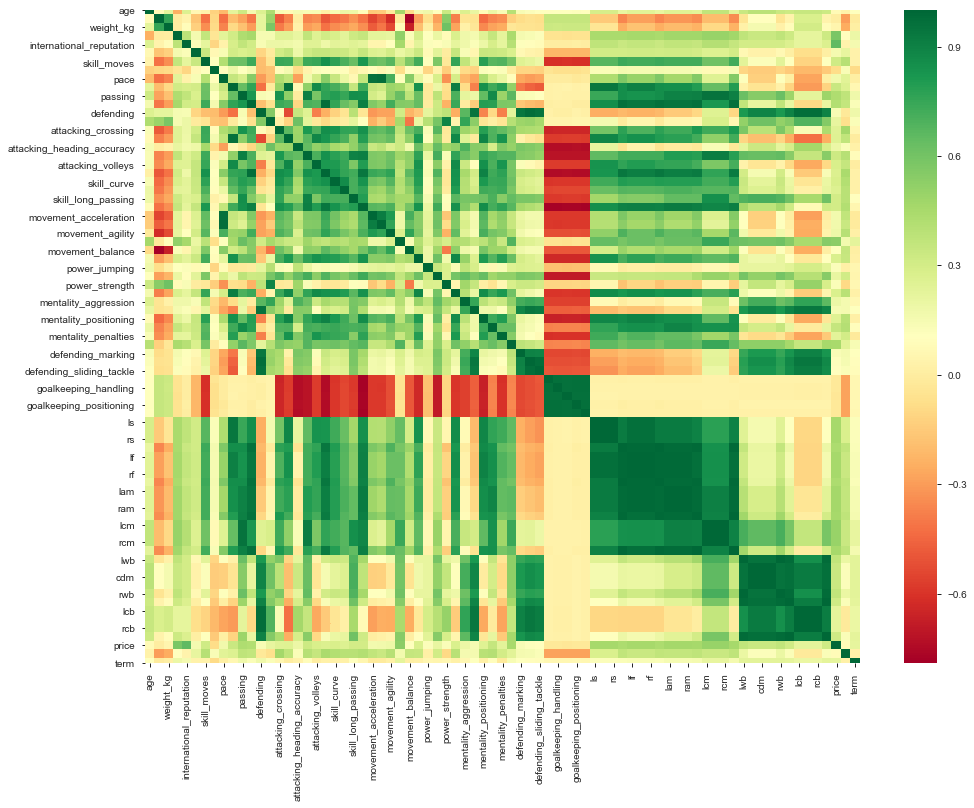

In [13]:
### eda
eda_n = con_eda(con_fifa_df)
#eda_n.to_csv('C:/Users/rahul/Documents/575/Project/eda_n.csv')
eda_n.to_csv(directory+'eda_n.csv')
################ no outliers detected #####################

####### correlation
cor_mat = con_fifa_df.corr()
cor_mat.to_csv(directory+'cor_mat.csv')
plt.figure(figsize=(16,12))
sns.heatmap(cor_mat, cmap='RdYlGn')

In [14]:
### Removing variable with 90% nulls
con_fifa_df = con_fifa_df.drop(['nation_jersey_number'],axis=1)

#######################################

### Removing variable with 90% nulls
con_fifa_test_df = con_fifa_test_df.drop(['nation_jersey_number'],axis=1)

In [15]:
#categorical data
cat_fifa_df = fifa_df.loc[:,fifa_df.dtypes[(fifa_df.dtypes == 'object')].index]
cat_fifa_df = cat_fifa_df.dropna(axis=1, how = 'all')
#cat_fifa_df.head()

##########################################
#categorical data
cat_fifa_test_df = fifa_test_df.loc[:,fifa_test_df.dtypes[(fifa_test_df.dtypes == 'object')].index]
cat_fifa_test_df = cat_fifa_test_df.dropna(axis=1, how = 'all')
#cat_fifa_test_df.head()

In [16]:
#eda for categorical
def cat_eda(cat_df):
    df1 = pd.DataFrame(cat_df.describe().transpose())
    df2 = pd.DataFrame(cat_df.isnull().sum())
    df_final = pd.merge(df1,df2, left_index=True, right_index=True)
    df_final.columns = ('count','unique','top','frequency','missing')
    return df_final

eda_c = cat_eda(cat_fifa_df)
eda_c.head(20)

,count,unique,top,frequency,missing
nationality,17770,160,England,1656,0
club,17770,679,Huddersfield Town,33,0
preferred_foot,17770,2,Right,13639,0
body_type,17770,10,Normal,10410,0
player_tags,1516,84,#Strength,509,16254
team_position,17547,29,SUB,7593,223
team_jersey_number,17770,2,0,11592,0
loaned_from,1281,342,Atalanta,20,16489
nation_position,1104,28,SUB,576,16666
player_traits,8010,1544,Speed Dribbler (CPU AI Only),365,9760


In [17]:
##### Removing categorical vars with large amt of nulls
cat_fifa_df = cat_fifa_df.drop(['player_tags','loaned_from','nation_position','player_traits'],axis=1)

######################################################
##### Removing categorical vars with large amt of nulls
cat_fifa_test_df = cat_fifa_test_df.drop(['player_tags','loaned_from','nation_position','player_traits'],axis=1)

In [18]:
################## recategorizing team position
cat_fifa_df['team_position'].fillna("not played", inplace=True)

D = ['LB','CB','RB','LCB','RCB','LWB','RWB']
M = ['LM','RM','CDM','CAM','RCM','CM','LCM','LDM','LAM','RDM','RAM']
A = ['LW','ST','RW','CF','LF','RF','RS','LS']


cat_fifa_df['Pos'] =""
for i in range(0,len(cat_fifa_df['team_position'])):
    if cat_fifa_df['team_position'][i] in D:
        cat_fifa_df['Pos'][i] = 'Defender'
    elif cat_fifa_df['team_position'][i] in M:
        cat_fifa_df['Pos'][i] = 'Mid-Fielder'
    elif cat_fifa_df['team_position'][i] in A:
        cat_fifa_df['Pos'][i] = 'Attacker'
    elif cat_fifa_df['team_position'][i] =='GK':
        cat_fifa_df['Pos'][i] = 'Goal-Keeper'
    elif cat_fifa_df['team_position'][i] =='RES':
        cat_fifa_df['Pos'][i] = 'Rest'
    elif cat_fifa_df['team_position'][i] =='SUB':
        cat_fifa_df['Pos'][i] = 'Substitute'
    else:
        cat_fifa_df['Pos'][i] = 'Not-Played'

cat_fifa_df = cat_fifa_df.drop(['team_position'],axis=1)

########################################################
cat_fifa_test_df['team_position'].fillna("not played", inplace=True)


cat_fifa_test_df['Pos'] =""
for i in range(0,len(cat_fifa_test_df['team_position'])):
    if cat_fifa_test_df['team_position'][i] in D:
        cat_fifa_test_df['Pos'][i] = 'Defender'
    elif cat_fifa_test_df['team_position'][i] in M:
        cat_fifa_test_df['Pos'][i] = 'Mid-Fielder'
    elif cat_fifa_test_df['team_position'][i] in A:
        cat_fifa_test_df['Pos'][i] = 'Attacker'
    elif cat_fifa_test_df['team_position'][i] =='GK':
        cat_fifa_test_df['Pos'][i] = 'Goal-Keeper'
    elif cat_fifa_test_df['team_position'][i] =='RES':
        cat_fifa_test_df['Pos'][i] = 'Rest'
    elif cat_fifa_test_df['team_position'][i] =='SUB':
        cat_fifa_test_df['Pos'][i] = 'Substitute'
    else:
        cat_fifa_test_df['Pos'][i] = 'Not-Played'

cat_fifa_test_df = cat_fifa_test_df.drop(['team_position'],axis=1)


In [19]:
eda_c = cat_eda(cat_fifa_df)
eda_c.head(20)

,count,unique,top,frequency,missing
nationality,17770,160,England,1656,0
club,17770,679,Huddersfield Town,33,0
preferred_foot,17770,2,Right,13639,0
body_type,17770,10,Normal,10410,0
team_jersey_number,17770,2,0,11592,0
rating,17770,2,0,12220,0
attack_rate,17770,3,Medium,12063,0
defence_rate,17770,3,Medium,13216,0
Pos,17770,7,Substitute,7593,0


In [20]:
#### population event rate
cat_fifa_df.groupby('rating').size()/len(cat_fifa_df)*100

rating
0    68.767586
1    31.232414
dtype: float64

In [21]:
############# treating high cardinality categorical variables
###### event rate by categorical variables
grp = cat_fifa_df.groupby('nationality')
p = grp.apply(lambda x: pd.Series([x['rating'].count(), x.loc[x.rating==1, 'rating'].count()], 
                                  index=['count', 'event']))
p['event_rate'] = p['event']/p['count']*100
p_temp = p.loc[(p['event_rate'] >= 35) & (p['count'] >= 100),:]
p_temp.sort_values(by='event_rate',ascending=False).head(14)
###analysis
## nationality - check with chi sq
## club - chi sq
## player_pos - can be taken count of positions
## preferred_foot - no variation
## body_type - insignificant
## team_position - seems significant - check with chi sq
## team_jersey_number - seems significant - will re-categorize
## attack_rate - seems significant
## defence_rate - seems significant

,count,event,event_rate
nationality,,,
Portugal,312,201,64.423077
Brazil,816,493,60.416667
Serbia,125,69,55.200000
Uruguay,142,78,54.929577
Croatia,126,64,50.793651
Ivory Coast,100,49,49.000000
Spain,1037,500,48.216008
Senegal,126,57,45.238095
Argentina,943,420,44.538706


In [22]:
#### On the basis of volume and event_rate - segregate major nations
Nat = ['Portugal','Brazil','Serbia','Uruguay','Croatia','Ivory Coast','Spain',
       'Senegal','Argentina','Belgium','France','Netherlands','Italy','Ghana']

cat_fifa_df['nation'] =np.where(cat_fifa_df['nationality'].isin(Nat), 'Major', 'Others')
cat_fifa_df = cat_fifa_df.drop(['nationality'],axis=1)

##########################################################################################
cat_fifa_test_df['nation'] =np.where(cat_fifa_test_df['nationality'].isin(Nat), 'Major', 'Others')
cat_fifa_test_df = cat_fifa_test_df.drop(['nationality'],axis=1)

In [23]:
###### event rate by categorical variables
grp = cat_fifa_df.groupby('club')
p = grp.apply(lambda x: pd.Series([x['rating'].count(), x.loc[x.rating==1, 'rating'].count()], 
                                  index=['count', 'event']))
p['event_rate'] = p['event']/p['count']*100
p_temp = p.loc[(p['event_rate'] >= 80) & (p['count'] >= 25),:]
p_temp.sort_values(by='event_rate',ascending=False).head(14)

,count,event,event_rate
club,,,
Napoli,25,25,100.000000
Sporting CP,29,28,96.551724
Juventus,25,24,96.000000
Milan,29,27,93.103448
SL Benfica,29,27,93.103448
Vitória Guimarães,29,26,89.655172
FC Porto,28,25,89.285714
SC Braga,28,25,89.285714
Cagliari,25,22,88.000000


In [24]:
#### On the basis of volume and event_rate - segregate major clubs
clubs = ['Napoli','Sporting CP','Juventus','Milan','SL Benfica','Vitória Guimarães',
         'FC Porto','SC Braga','Cagliari','Roma','Bayer 04 Leverkusen','Boca Juniors','FC Barcelona','Bologna']

cat_fifa_df['club_new'] =np.where(cat_fifa_df['club'].isin(clubs), 'Major', 'Others')
cat_fifa_df = cat_fifa_df.drop(['club'],axis=1)

################################################################################################
cat_fifa_test_df['club_new'] =np.where(cat_fifa_test_df['club'].isin(clubs), 'Major', 'Others')
cat_fifa_test_df = cat_fifa_test_df.drop(['club'],axis=1)

In [25]:
eda_c = cat_eda(cat_fifa_df)
eda_c.head(20)

,count,unique,top,frequency,missing
preferred_foot,17770,2,Right,13639,0
body_type,17770,10,Normal,10410,0
team_jersey_number,17770,2,0,11592,0
rating,17770,2,0,12220,0
attack_rate,17770,3,Medium,12063,0
defence_rate,17770,3,Medium,13216,0
Pos,17770,7,Substitute,7593,0
nation,17770,2,Others,11618,0
club_new,17770,2,Others,17387,0


In [26]:
############# Chi-sq test ################################
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

cat_fifa_df_1 = cat_fifa_df.copy()
cin = list(cat_fifa_df_1.columns)
for i in cin:
    cat_fifa_df_1[i] = label_encoder.fit_transform(cat_fifa_df_1[i].astype(str))
    
from sklearn.feature_selection import chi2
X = cat_fifa_df_1.drop('rating',axis=1)
y = cat_fifa_df_1['rating']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
print(p_values)

preferred_foot         2.856450e-01
club_new               2.736419e-04
body_type              1.120924e-07
defence_rate           4.002939e-26
attack_rate            6.582139e-54
team_jersey_number     1.948734e-62
nation                 4.307277e-84
Pos                   1.142634e-238
dtype: float64


In [27]:
# removed preferred_foot from feature selection
#### also body_type is 90% same for all hence removing that
cat_fifa_df = cat_fifa_df.drop(['body_type','preferred_foot'],axis=1)


###########################################
cat_fifa_test_df = cat_fifa_test_df.drop(['body_type','preferred_foot'],axis=1)
# removed from feature selection 

In [28]:
######### missing value imputation in some continuous variables with minimum
list_min = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
for i in list_min:
    con_fifa_df[i].fillna(con_fifa_df[i].min(),inplace=True)
    
###########################################################################################

for i in list_min:
    con_fifa_test_df[i].fillna(con_fifa_df.min(),inplace=True)

In [29]:
############# Missing value imputation with mean as there are no such outliers and it makes sense to replace values with mean
###as the values are ratings for different different skills
m_impute = con_fifa_df.loc[:,con_fifa_df.dtypes[(con_fifa_df.dtypes != 'object')].index]
li = list(m_impute.columns)
for i in li:
    con_fifa_df[i].fillna(con_fifa_df[i].mean(),inplace=True)
    
#####################################################
###### imputing with mean of train
for i in li:
    con_fifa_test_df[i].fillna(con_fifa_df[i].mean(),inplace=True)

In [30]:
# merging categorical variables
nrow = cat_fifa_df.shape[0]
cat_dum = pd.concat([cat_fifa_df,cat_fifa_test_df])

dum = pd.get_dummies(cat_dum,drop_first=True)

train_dummy = dum[:nrow]
test_dummy= dum[nrow:]

In [31]:
# create data frames with dummies

#train_dummy = pd.get_dummies(cat_fifa_df,drop_first=True)
#cat_fifa_df = pd.concat([cat_fifa_df, dummies], axis=1)
#cat_fifa_df = cat_fifa_df.drop(, 1)

fifa_train_df_dummy = pd.merge(train_dummy,con_fifa_df, left_index=True, right_index=True)
#fifa_train_df_dummy.head()

################### will see another approach ##############
#############################################
#test_dummy = pd.get_dummies(cat_fifa_test_df,drop_first=True)
fifa_test_df_dummy = pd.merge(test_dummy,con_fifa_test_df, left_index=True, right_index=True)
fifa_test_df_dummy.shape

(18278, 90)

In [32]:
################### Bi - variate analysis
#fifa_bivariate = pd.DataFrame({'rating':[]})
#for i in con_fifa_df.columns:
 #   temp = pd.DataFrame(fifa_df.groupby("rating")[i].mean())
  #  temp = temp.reset_index(level=['rating'])
   # fifa_bivariate = pd.concat([fifa_bivariate, temp], axis=1)


########################### t-test ##############################
from scipy.stats import ttest_ind

df1 = fifa_train_df_dummy[fifa_train_df_dummy['rating_1']==1]
df2 = fifa_train_df_dummy[fifa_train_df_dummy['rating_1']==0]

con_df1 = df1.loc[:,df1.dtypes[(df1.dtypes != 'object')].index]
con_df1 = con_df1.dropna(axis =1,how="all")
con_df1 = con_df1.drop("rating_1",axis=1)

con_df2 = df2.loc[:,df2.dtypes[(df2.dtypes != 'object')].index]
con_df2 = con_df2.dropna(axis =1,how="all")
con_df2 = con_df2.drop("rating_1",axis=1)

tresults = ttest_ind(con_df1, con_df2)

#np.vstack((np.array(con_df1.columns),tresults[1]))
cols = np.array(con_df1.columns)
dataset = pd.DataFrame({'col': cols, 'p-val': tresults[1]}, columns=['col', 'p-val'])
#tresults[1]

In [33]:
dataset.sort_values(by='p-val',ascending=False).head(15)

,col,p-val
1,attack_rate_Low,6.490891e-01
58,goalkeeping_positioning,4.473095e-01
8,Pos_Not-Played,2.850889e-01
55,goalkeeping_diving,2.510405e-01
56,goalkeeping_handling,2.404902e-01
59,goalkeeping_reflexes,1.938892e-01
57,goalkeeping_kicking,4.111697e-02
3,defence_rate_Low,7.941719e-04
14,height_cm,3.288185e-05
40,movement_balance,2.825440e-18


In [34]:
fifa_train_df_dummy.head()

,team_jersey_number_1,rating_1,attack_rate_Low,attack_rate_Medium,defence_rate_Low,defence_rate_Medium,Pos_Defender,Pos_Goal-Keeper,Pos_Mid-Fielder,Pos_Not-Played,Pos_Rest,Pos_Substitute,nation_Others,club_new_Others,age,height_cm,weight_kg,potential,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,price,playing_positions,term
0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,33,187,83,94,5,4,5,90.0,93.0,81.0,89.0,35.0,79.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94.000000,94.000000,94.000000,92.000000,93.000000,93.000000,93.000000,92.000000,91.000000,91.000000,91.000000,91.000000,84.000000,84.000000,84.000000,91.000000,68.000000,64.000000,64.000000,64.000000,68.000000,64.000000,56.000000,56.000000,56.000000,64.000000,148160000.0,2,4.0
1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,31,170,72,94,5,4,4,88.0,91.0,88.0,96.0,32.0,61.0,77.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,90.000000,90.000000,90.000000,94.000000,95.000000,95.000000,95.000000,94.000000,95.000000,95.000000,95.000000,92.000000,86.000000,86.000000,86.000000,92.000000,65.000000,63.000000,63.000000,63.000000,65.000000,60.000000,49.000000,49.000000,49.000000,60.000000,255880000.0,3,17.0
2,1,1,0,0,0,1,0,0,1,0,0,0,0,1,26,175,68,93,5,5,5,92.0,84.0,83.0,95.0,32.0,59.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,87.000000,87.000000,87.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,91.000000,84.000000,84.000000,84.000000,91.000000,68.000000,63.000000,63.000000,63.000000,68.000000,63.000000,50.000000,50.000000,50.000000,63.000000,243180000.0,2,5.0
3,1,1,0,1,0,1,0,1,0,0,0,0,0,1,27,193,76,93,4,3,1,24.0,15.0,24.0,23.0,15.0,30.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,59.762671,59.762671,59.762671,60.963571,60.644323,60.644323,60.644323,60.963571,60.908768,60.908768,60.908768,61.646858,60.137608,60.137608,60.137608,61.646858,59.427078,58.741384,58.741384,58.741384,59.427078,58.725101,57.550558,57.550558,57.550558,58.725101,152120000.0,1,8.0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,27,181,70,92,4,5,4,77.0,86.0,92.0,87.0,60.0,78.0,93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,60.0,87.0,94.0,79.0,88.0,67.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,85.000000,85.000000,85.000000,90.000000,90.000000,90.000000,90.000000,90.000000,91.000000,91.000000,91.000000,91.000000,90.000000,90.000000,90.000000,91.000000,80.000000,80.000000,80.000000,80.000000,80.000000,76.000000,69.000000,69.000000,69.000000,76.000000,214860000.0,2,8.0


In [35]:
X = fifa_train_df_dummy.drop(['rating_1'],axis=1)
y = fifa_train_df_dummy['rating_1']

X_test = fifa_test_df_dummy.drop(['rating_1','price'],axis=1)
y_test = fifa_test_df_dummy['rating_1']

In [36]:
from sklearn.model_selection import train_test_split
X_train_temp, X_val_temp, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
X_train = X_train_temp.drop(['price'],axis=1)
X_val = X_val_temp.drop(['price'],axis=1)

# Running Baseline Models

In [38]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_train)
predictions_v = logmodel.predict(X_val)
predictions_t = logmodel.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

############ confusion matrix, auc and report ###############
######## train ######
print(classification_report(y_train,predictions))
print(confusion_matrix(y_train,predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions)
print(metrics.auc(fpr, tpr))
########### val ##########
print(classification_report(y_val,predictions_v))
print(confusion_matrix(y_val,predictions_v))
fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions_v)
print(metrics.auc(fpr, tpr))
##### test ###############
print(classification_report(y_test,predictions_t))
print(confusion_matrix(y_test,predictions_t))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_t)
print(metrics.auc(fpr, tpr))


C:\Users\baban\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8549
           1       0.88      0.86      0.87      3890

    accuracy                           0.92     12439
   macro avg       0.91      0.90      0.91     12439
weighted avg       0.92      0.92      0.92     12439

[[8110  439]
 [ 541 3349]]
0.9047872073313344
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3671
           1       0.89      0.85      0.87      1660

    accuracy                           0.92      5331
   macro avg       0.91      0.90      0.90      5331
weighted avg       0.92      0.92      0.92      5331

[[3491  180]
 [ 252 1408]]
0.8995799050191504
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12620
           1       0.87      0.87      0.87      5658

    accuracy                           0.92     18278
   macro avg       0.91      0.91   

import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
result = logit.fit()
print (result.summary())

In [39]:
# KNN for 1 neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

predictions = knn.predict(X_train)
predictions_v = knn.predict(X_val)
predictions_t = knn.predict(X_test)

############ confusion matrix, auc and report ###############
######## train ######
print(classification_report(y_train,predictions))
print(confusion_matrix(y_train,predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions)
print(metrics.auc(fpr, tpr))
########### val ##########
print(classification_report(y_val,predictions_v))
print(confusion_matrix(y_val,predictions_v))
fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions_v)
print(metrics.auc(fpr, tpr))
##### test ###############
print(classification_report(y_test,predictions_t))
print(confusion_matrix(y_test,predictions_t))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_t)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8549
           1       1.00      1.00      1.00      3890

    accuracy                           1.00     12439
   macro avg       1.00      1.00      1.00     12439
weighted avg       1.00      1.00      1.00     12439

[[8549    0]
 [   0 3890]]
1.0
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3671
           1       0.88      0.82      0.85      1660

    accuracy                           0.91      5331
   macro avg       0.90      0.88      0.89      5331
weighted avg       0.91      0.91      0.91      5331

[[3484  187]
 [ 300 1360]]
0.8841686550068429
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12620
           1       0.89      0.88      0.88      5658

    accuracy                           0.93     18278
   macro avg       0.92      0.91      0.91     182

In [40]:
# decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)


predictions = dtree.predict(X_train)
predictions_v = dtree.predict(X_val)
predictions_t = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

############ confusion matrix, auc and report ###############
######## train ######
print(classification_report(y_train,predictions))
print(confusion_matrix(y_train,predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions)
print(metrics.auc(fpr, tpr))
########### val ##########
print(classification_report(y_val,predictions_v))
print(confusion_matrix(y_val,predictions_v))
fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions_v)
print(metrics.auc(fpr, tpr))
##### test ###############
print(classification_report(y_test,predictions_t))
print(confusion_matrix(y_test,predictions_t))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_t)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8549
           1       1.00      1.00      1.00      3890

    accuracy                           1.00     12439
   macro avg       1.00      1.00      1.00     12439
weighted avg       1.00      1.00      1.00     12439

[[8549    0]
 [   0 3890]]
1.0
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3671
           1       0.94      0.94      0.94      1660

    accuracy                           0.96      5331
   macro avg       0.96      0.96      0.96      5331
weighted avg       0.96      0.96      0.96      5331

[[3573   98]
 [  93 1567]]
0.9586400901891413
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12620
           1       0.95      0.95      0.95      5658

    accuracy                           0.97     18278
   macro avg       0.97      0.97      0.97     182

In [41]:
# SVM - ###### It's gonna take more than 5 minutes
y_train_svm= np.where(y_train == 0,-1, 1)
y_val_svm= np.where(y_val == 0,-1, 1)
y_test_svm= np.where(y_test == 0,-1, 1)
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train,y_train_svm)

predictions = svc_model.predict(X_train)
predictions_v = svc_model.predict(X_val)
predictions_t = svc_model.predict(X_test)

############ confusion matrix, auc and report ###############
######## train ######
print(classification_report(y_train_svm,predictions))
print(confusion_matrix(y_train_svm,predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_train_svm, predictions)
print(metrics.auc(fpr, tpr))
########### val ##########
print(classification_report(y_val_svm,predictions_v))
print(confusion_matrix(y_val_svm,predictions_v))
fpr, tpr, thresholds = metrics.roc_curve(y_val_svm, predictions_v)
print(metrics.auc(fpr, tpr))
##### test ###############
print(classification_report(y_test_svm,predictions_t))
print(confusion_matrix(y_test_svm,predictions_t))
fpr, tpr, thresholds = metrics.roc_curve(y_test_svm, predictions_t)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95      8549
           1       0.91      0.88      0.90      3890

    accuracy                           0.94     12439
   macro avg       0.93      0.92      0.92     12439
weighted avg       0.94      0.94      0.94     12439

[[8217  332]
 [ 465 3425]]
0.920813886739711
              precision    recall  f1-score   support

          -1       0.94      0.96      0.95      3671
           1       0.92      0.86      0.89      1660

    accuracy                           0.93      5331
   macro avg       0.93      0.91      0.92      5331
weighted avg       0.93      0.93      0.93      5331

[[3542  129]
 [ 225 1435]]
0.9146587712878209
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95     12620
           1       0.87      0.90      0.89      5658

    accuracy                           0.93     18278
   macro avg       0.92      0.92    

# Improving models

In [42]:
############### Cramer's V function
import scipy.stats as ss
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [43]:
########## Calculating cramer's V
confusion_matrix = pd.crosstab(cat_fifa_df["club_new"], cat_fifa_df["rating"]).as_matrix()
print("DF club", len(confusion_matrix)-1)
print(cramers_v(confusion_matrix))
confusion_matrix = pd.crosstab(cat_fifa_df["defence_rate"], cat_fifa_df["rating"]).as_matrix()
print("DF_def", len(confusion_matrix)-1)
print(cramers_v(confusion_matrix))
confusion_matrix = pd.crosstab(cat_fifa_df["attack_rate"], cat_fifa_df["rating"]).as_matrix()
print("DF_att", len(confusion_matrix)-1)
print(cramers_v(confusion_matrix))
confusion_matrix = pd.crosstab(cat_fifa_df["team_jersey_number"], cat_fifa_df["rating"]).as_matrix()
print("DF_team_jer", len(confusion_matrix)-1)
print(cramers_v(confusion_matrix))
confusion_matrix = pd.crosstab(cat_fifa_df["nation"], cat_fifa_df["rating"]).as_matrix()
print("DF_nation", len(confusion_matrix)-1)
print(cramers_v(confusion_matrix))
confusion_matrix = pd.crosstab(cat_fifa_df["Pos"], cat_fifa_df["rating"]).as_matrix()
print("DF_pos", len(confusion_matrix)-1)
print(cramers_v(confusion_matrix))

DF club 1
0.18538235193584315
DF_def 2
0.12969427530103242
DF_att 2
0.1564584798840482
DF_team_jer 1
0.15458405557943475
DF_nation 1
0.24748715182584474
DF_pos 6
0.3127924728277858


C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future 

In [44]:
###### Removing correlated variables and highly non-significant variable
### On the basis of correlation matrix, Cramer's V, Chi-square test and t-statistic
### Cramer's V significant variables
cramer = [col for col in fifa_train_df_dummy if col.startswith(('club_new','Pos','attack_rate','nation'))]

In [45]:
corr = ['potential','international_reputation','passing','dribbling',
        'movement_reactions','mentality_composure','cm','rb','rating_1','price']

In [46]:
###### Significant variables
fifa_train_df_dummy_rep = fifa_train_df_dummy[corr+cramer]
fifa_test_df_dummy_rep = fifa_test_df_dummy[corr+cramer]

In [47]:
X = fifa_train_df_dummy_rep.drop(['rating_1'],axis=1)
y = fifa_train_df_dummy_rep['rating_1']

X_test_temp = fifa_test_df_dummy_rep.drop(['rating_1'],axis=1)
y_test = fifa_test_df_dummy_rep['rating_1']

In [48]:
from sklearn.model_selection import train_test_split
X_train_temp, X_val_temp, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
X_train = X_train_temp.drop(['price'],axis=1)
X_val = X_val_temp.drop(['price'],axis=1)
X_test = X_test_temp.drop(['price'],axis=1)

In [50]:
# logistic regression with l1 penalty
logmodel = LogisticRegression(penalty='l1', solver='liblinear')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_train)
predictions_v = logmodel.predict(X_val)
predictions_t = logmodel.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

############ confusion matrix, auc and report ###############
######## train ######
print(classification_report(y_train,predictions))
print(confusion_matrix(y_train,predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions)
print(metrics.auc(fpr, tpr))
########### val ##########
print(classification_report(y_val,predictions_v))
print(confusion_matrix(y_val,predictions_v))
fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions_v)
print(metrics.auc(fpr, tpr))
##### test ###############
print(classification_report(y_test,predictions_t))
print(confusion_matrix(y_test,predictions_t))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_t)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8549
           1       0.87      0.83      0.85      3890

    accuracy                           0.91     12439
   macro avg       0.90      0.89      0.89     12439
weighted avg       0.91      0.91      0.91     12439

[[8066  483]
 [ 657 3233]]
0.8873037812266863
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3671
           1       0.89      0.83      0.86      1660

    accuracy                           0.91      5331
   macro avg       0.91      0.89      0.90      5331
weighted avg       0.91      0.91      0.91      5331

[[3495  176]
 [ 280 1380]]
0.8916909807576807
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     12620
           1       0.87      0.83      0.85      5658

    accuracy                           0.91     18278
   macro avg       0.90      0.89   

Logistic: f1=0.848 auc=0.938


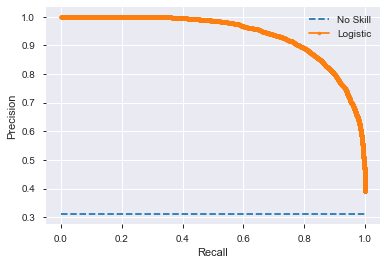

In [51]:
##### precision-recall curve #####

# precision recall 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot


lr_probs = logmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logmodel.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores

testy = y_test
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

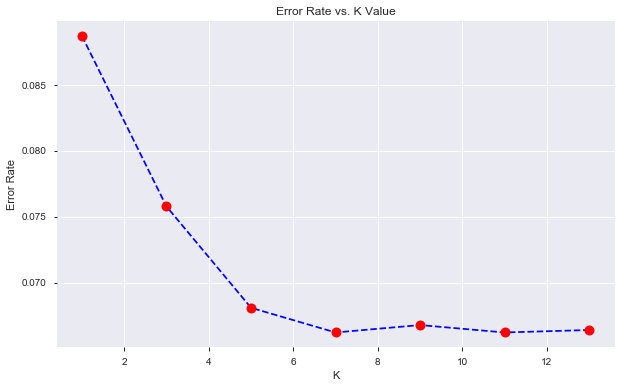

In [52]:
##### KNN Choosing best K
error_rate = []

# Will take some time
for i in range(1,15,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15,2),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

x = np.argmin(error_rate)
optimal_knn = list(range(1,15,2))[x]

In [53]:
# KNN with optimal K neighbours which is 7 from above
optimal_knn = 7
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=optimal_knn)
knn.fit(X_train,y_train)

predictions = knn.predict(X_train)
predictions_v = knn.predict(X_val)
predictions_t = knn.predict(X_test)

############ confusion matrix, auc and report ###############
######## train ######
print(classification_report(y_train,predictions))
print(confusion_matrix(y_train,predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions)
print(metrics.auc(fpr, tpr))
########### val ##########
print(classification_report(y_val,predictions_v))
print(confusion_matrix(y_val,predictions_v))
fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions_v)
print(metrics.auc(fpr, tpr))
##### test ###############
print(classification_report(y_test,predictions_t))
print(confusion_matrix(y_test,predictions_t))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_t)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8549
           1       0.93      0.89      0.91      3890

    accuracy                           0.95     12439
   macro avg       0.94      0.93      0.94     12439
weighted avg       0.95      0.95      0.95     12439

[[8299  250]
 [ 416 3474]]
0.9319079698132134
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3671
           1       0.91      0.87      0.89      1660

    accuracy                           0.93      5331
   macro avg       0.93      0.92      0.92      5331
weighted avg       0.93      0.93      0.93      5331

[[3535  136]
 [ 217 1443]]
0.9161149911550315
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12620
           1       0.91      0.83      0.87      5658

    accuracy                           0.92     18278
   macro avg       0.92      0.89   

KNN: f1=0.867 auc=0.940


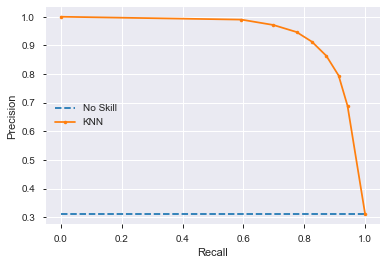

In [54]:

lr_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = knn.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores

testy = y_test
print('KNN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='KNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [55]:
g = [0,0.1,0.2,0.3,0.4,0.5]

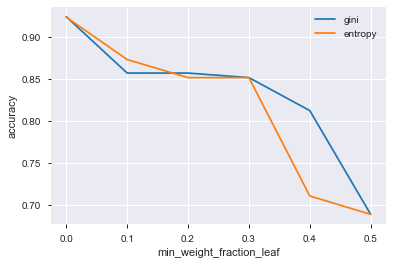

In [56]:
from sklearn.metrics import accuracy_score
max_depth = []
acc_gini = []
acc_entropy = []

for i in g:
 dtree = DecisionTreeClassifier(criterion='gini', min_weight_fraction_leaf=i )
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_val)
 acc_gini.append(accuracy_score(y_val, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy',min_weight_fraction_leaf=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_val)
 acc_entropy.append(accuracy_score(y_val, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'min_weight_fraction_leaf':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('min_weight_fraction_leaf','acc_gini', data=d, label='gini')
plt.plot('min_weight_fraction_leaf','acc_entropy', data=d, label='entropy')
plt.xlabel('min_weight_fraction_leaf')
plt.ylabel('accuracy')
plt.legend()

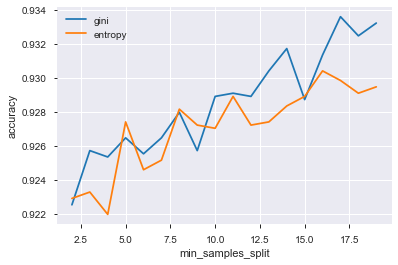

In [57]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(2,20,1):
 dtree = DecisionTreeClassifier(criterion='gini', min_samples_split=i )
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_val)
 acc_gini.append(accuracy_score(y_val, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy',min_samples_split=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_val)
 acc_entropy.append(accuracy_score(y_val, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'min_samples_split':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('min_samples_split','acc_gini', data=d, label='gini')
plt.plot('min_samples_split','acc_entropy', data=d, label='entropy')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()

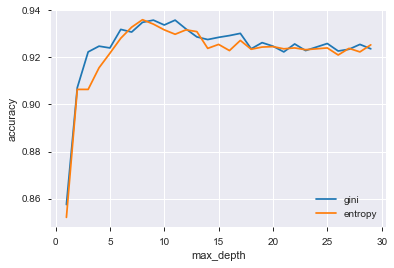

In [58]:
from sklearn.metrics import accuracy_score
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini',max_depth=i )
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_val)
 acc_gini.append(accuracy_score(y_val, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_val)
 acc_entropy.append(accuracy_score(y_val, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [59]:
# decision trees 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',min_weight_fraction_leaf=0,min_samples_split=17,max_depth=10)
dtree.fit(X_train,y_train)


predictions = dtree.predict(X_train)
predictions_v = dtree.predict(X_val)
predictions_t = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

############ confusion matrix, auc and report ###############
######## train ######
print(classification_report(y_train,predictions))
print(confusion_matrix(y_train,predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions)
print(metrics.auc(fpr, tpr))
########### val ##########
print(classification_report(y_val,predictions_v))
print(confusion_matrix(y_val,predictions_v))
fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions_v)
print(metrics.auc(fpr, tpr))
##### test ###############
print(classification_report(y_test,predictions_t))
print(confusion_matrix(y_test,predictions_t))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_t)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8549
           1       0.94      0.92      0.93      3890

    accuracy                           0.96     12439
   macro avg       0.95      0.95      0.95     12439
weighted avg       0.96      0.96      0.96     12439

[[8301  248]
 [ 303 3587]]
0.9465493641523941
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3671
           1       0.90      0.89      0.90      1660

    accuracy                           0.94      5331
   macro avg       0.93      0.92      0.93      5331
weighted avg       0.94      0.94      0.94      5331

[[3515  156]
 [ 180 1480]]
0.924535516076838
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     12620
           1       0.91      0.88      0.89      5658

    accuracy                           0.93     18278
   macro avg       0.93      0.92    

Logistic: f1=0.893 auc=0.947


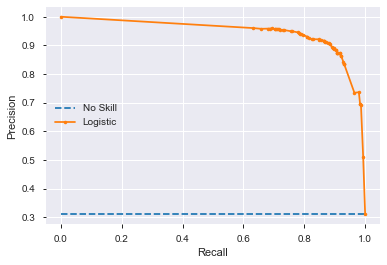

In [60]:
lr_probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = dtree.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores

testy = y_test
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM  linear 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,0.1,1, 10, 100],'kernel':['linear'],'probability':[True]}
grid_L = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=3)
grid_L.fit(X_train,y_train_svm)
grid_predictions = grid_L.predict(X_test)
print(confusion_matrix(y_test_svm,grid_predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_test_svm, grid_predictions)
print("Auc:" , metrics.auc(fpr, tpr))

print(grid_L.best_estimator_)

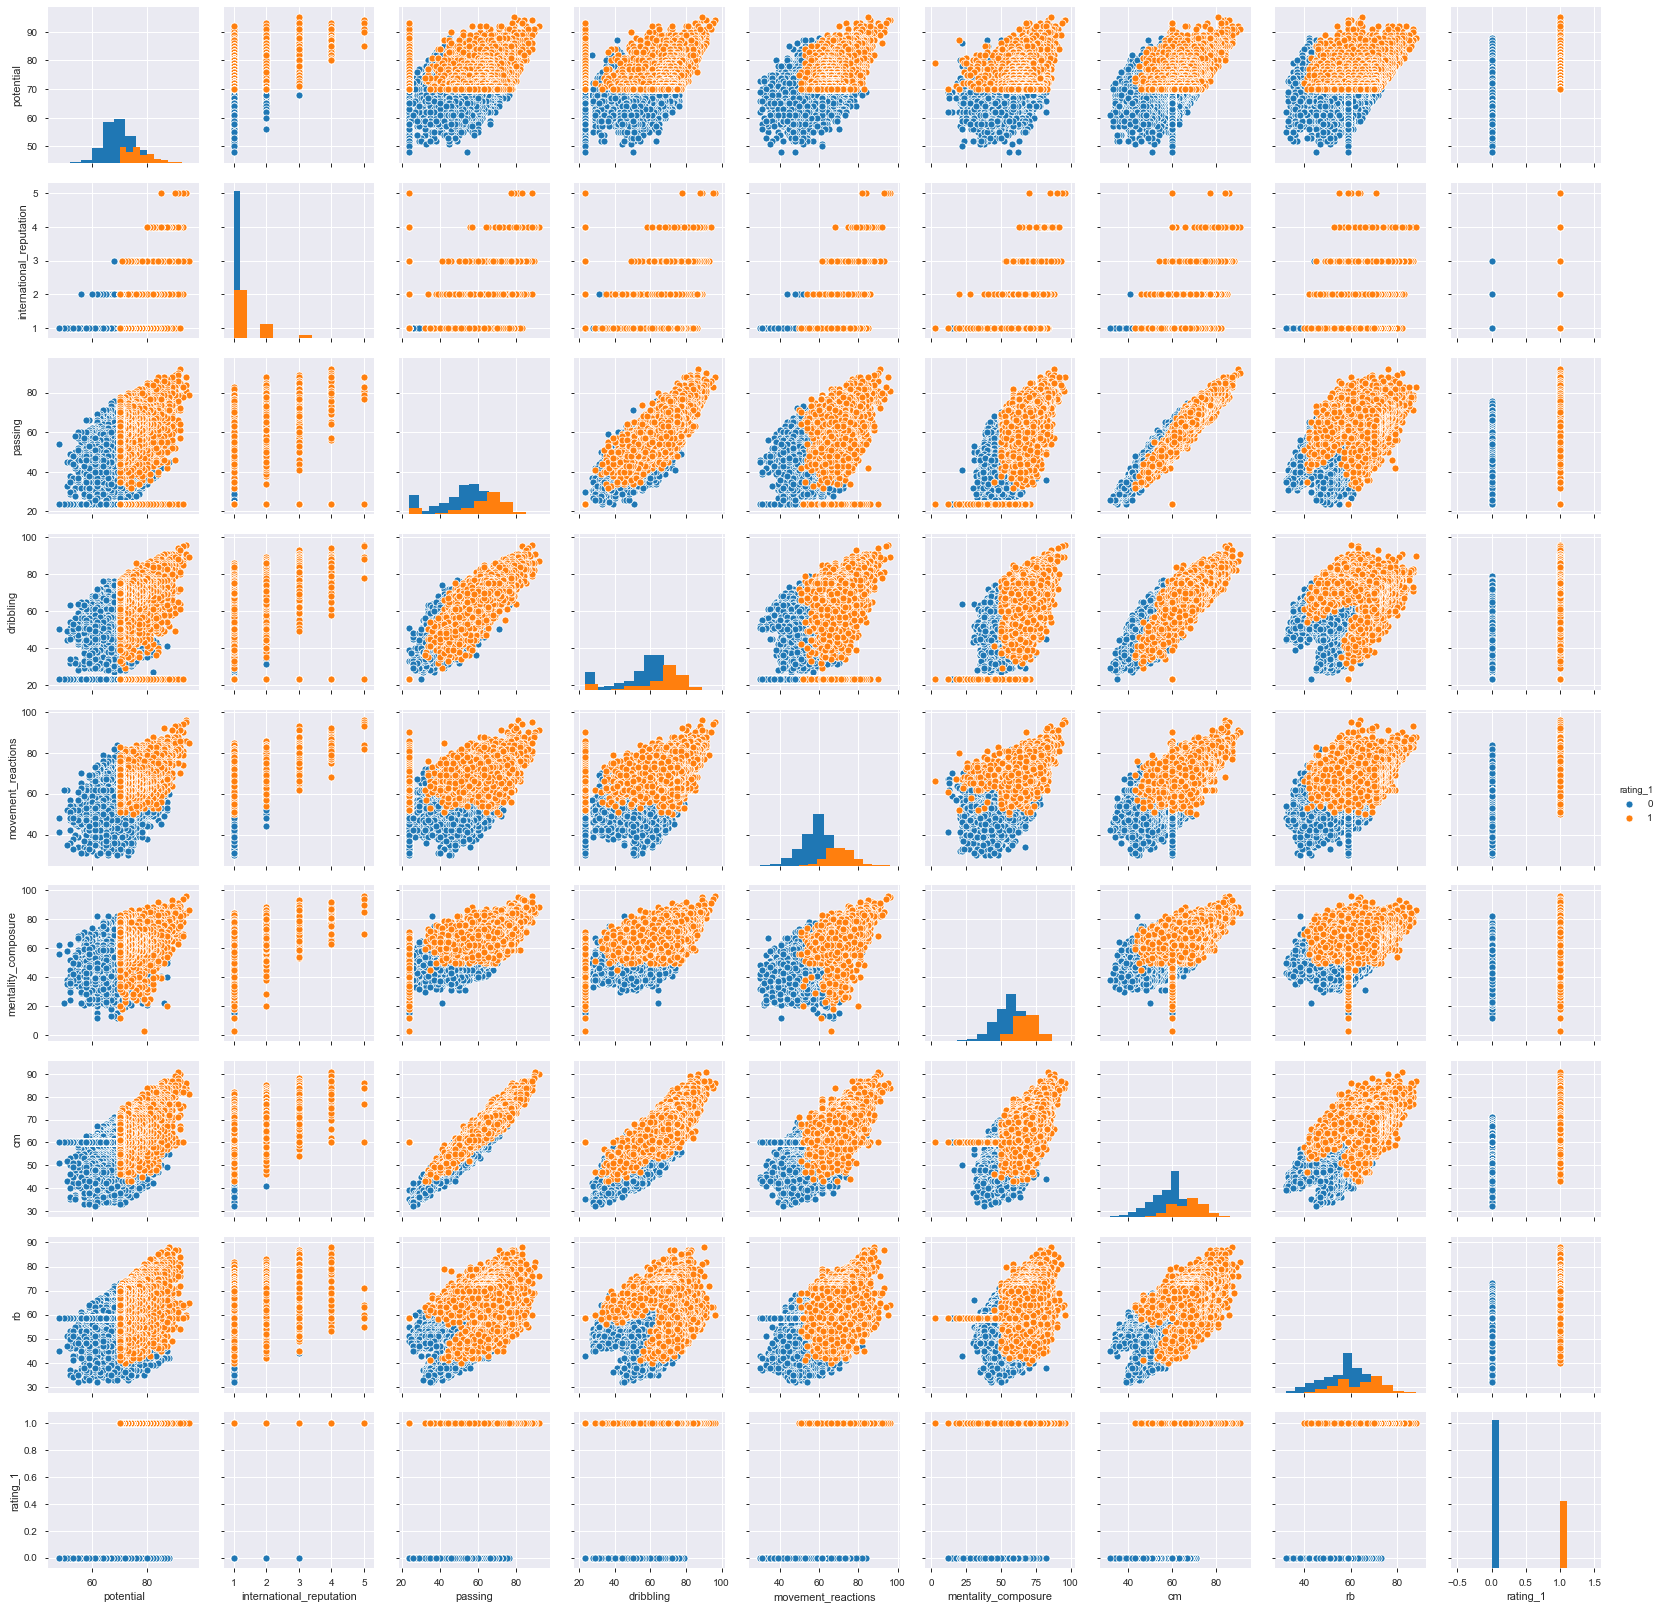

In [61]:
sns.pairplot(fifa_train_df_dummy_rep, vars=['potential','international_reputation','passing','dribbling',
        'movement_reactions','mentality_composure','cm','rb','rating_1'], hue='rating_1', diag_kind ='hist')

In [62]:
# SVM - ###### It's gonna take 3-4 minutes
y_train_svm= np.where(y_train == 0,-1, 1)
y_val_svm= np.where(y_val == 0,-1, 1)
y_test_svm= np.where(y_test == 0,-1, 1)
from sklearn.svm import SVC
svc_model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
svc_model.fit(X_train,y_train_svm)

predictions = svc_model.predict(X_train)
predictions_v = svc_model.predict(X_val)
predictions_t = svc_model.predict(X_test)

############ confusion matrix, auc and report ###############
######## train ######
print(classification_report(y_train_svm,predictions))
print(confusion_matrix(y_train_svm,predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_train_svm, predictions)
print(metrics.auc(fpr, tpr))
########### val ##########
print(classification_report(y_val_svm,predictions_v))
print(confusion_matrix(y_val_svm,predictions_v))
fpr, tpr, thresholds = metrics.roc_curve(y_val_svm, predictions_v)
print(metrics.auc(fpr, tpr))
##### test ###############
print(classification_report(y_test_svm,predictions_t))
print(confusion_matrix(y_test_svm,predictions_t))
fpr, tpr, thresholds = metrics.roc_curve(y_test_svm, predictions_t)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

          -1       0.92      0.94      0.93      8549
           1       0.87      0.83      0.85      3890

    accuracy                           0.91     12439
   macro avg       0.90      0.89      0.89     12439
weighted avg       0.91      0.91      0.91     12439

[[8067  482]
 [ 668 3222]]
0.8859483858512894
              precision    recall  f1-score   support

          -1       0.92      0.95      0.94      3671
           1       0.89      0.82      0.86      1660

    accuracy                           0.91      5331
   macro avg       0.91      0.89      0.90      5331
weighted avg       0.91      0.91      0.91      5331

[[3501  170]
 [ 291 1369]]
0.8891949437630664
              precision    recall  f1-score   support

          -1       0.92      0.95      0.93     12620
           1       0.87      0.82      0.85      5658

    accuracy                           0.91     18278
   macro avg       0.90      0.88   

Logistic: f1=0.846 auc=0.937


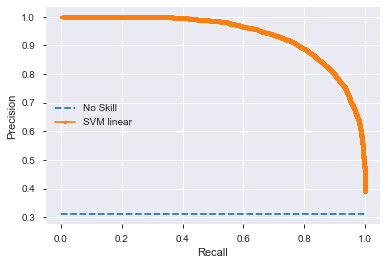

In [63]:
lr_probs = svc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = svc_model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test_svm, lr_probs)
lr_f1, lr_auc = f1_score(y_test_svm, yhat), auc(lr_recall, lr_precision)
# summarize scores

testy = y_test
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM linear')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# rbf
param_grid = {'C': [0.01,0.1,1, 10, 100], 'gamma': [0,1,0.1,0.01,0.001],'kernel':['rbf'],'probability':[True]}
grid_R = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=3)
grid_R.fit(X_train,y_train_svm)
grid_predictions = grid_R.predict(X_test)
print(confusion_matrix(y_test_svm,grid_predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_test_svm, grid_predictions)
print("Auc:" , metrics.auc(fpr, tpr))

print(grid_R.best_estimator_)

# BEST MODEL

In [64]:
# SVM - ###### It's gonna take 3-4 minutes
y_train_svm= np.where(y_train == 0,-1, 1)
y_val_svm= np.where(y_val == 0,-1, 1)
y_test_svm= np.where(y_test == 0,-1, 1)
from sklearn.svm import SVC
svc_model = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
svc_model.fit(X_train,y_train_svm)

predictions = svc_model.predict(X_train)
predictions_v = svc_model.predict(X_val)
predictions_t = svc_model.predict(X_test)

############ confusion matrix, auc and report ###############
######## train ######
print(classification_report(y_train_svm,predictions))
print(confusion_matrix(y_train_svm,predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_train_svm, predictions)
print(metrics.auc(fpr, tpr))
########### val ##########
print(classification_report(y_val_svm,predictions_v))
print(confusion_matrix(y_val_svm,predictions_v))
fpr, tpr, thresholds = metrics.roc_curve(y_val_svm, predictions_v)
print(metrics.auc(fpr, tpr))
##### test ###############
print(classification_report(y_test_svm,predictions_t))
print(confusion_matrix(y_test_svm,predictions_t))
fpr, tpr, thresholds = metrics.roc_curve(y_test_svm, predictions_t)
print(metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      8549
           1       0.94      0.91      0.92      3890

    accuracy                           0.95     12439
   macro avg       0.95      0.94      0.94     12439
weighted avg       0.95      0.95      0.95     12439

[[8315  234]
 [ 354 3536]]
0.9408129034469672
              precision    recall  f1-score   support

          -1       0.95      0.96      0.96      3671
           1       0.92      0.90      0.91      1660

    accuracy                           0.94      5331
   macro avg       0.94      0.93      0.93      5331
weighted avg       0.94      0.94      0.94      5331

[[3538  133]
 [ 171 1489]]
0.9303790208504953
              precision    recall  f1-score   support

          -1       0.94      0.97      0.96     12620
           1       0.93      0.87      0.90      5658

    accuracy                           0.94     18278
   macro avg       0.94      0.92   

Logistic: f1=0.897 auc=0.961


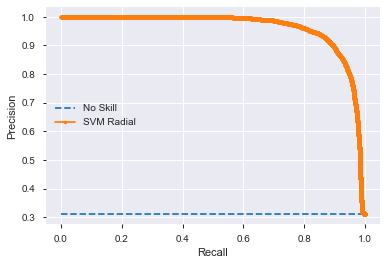

In [65]:
lr_probs = svc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = svc_model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test_svm, lr_probs)
lr_f1, lr_auc = f1_score(y_test_svm, yhat), auc(lr_recall, lr_precision)
# summarize scores

testy = y_test
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM Radial')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [66]:
predictions2 = np.where(predictions == 1,1,0)
predictions_v2 = np.where(predictions_v == 1,1,0)
predictions_t2 = np.where(predictions_t == 1,1,0)

# Model 2 for price 

In [67]:
X_train_temp['rating'] = predictions2
X_val_temp['rating'] = predictions_v2
X_test_temp['rating'] = predictions_t2

C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\baban\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
X_train_temp.head()

,potential,international_reputation,passing,dribbling,movement_reactions,mentality_composure,cm,rb,price,attack_rate_Low,attack_rate_Medium,Pos_Defender,Pos_Goal-Keeper,Pos_Mid-Fielder,Pos_Not-Played,Pos_Rest,Pos_Substitute,nation_Others,club_new_Others,rating
2163,81,1,71.0,77.0,62.0,62.0,71.0,62.0,1.998000e+07,0,1,0,0,0,0,0,1,0,1,1
11355,66,1,61.0,65.0,60.0,62.0,61.0,52.0,9.950000e+05,0,1,0,0,0,0,0,1,0,1,0
9616,66,1,64.0,68.0,67.0,52.0,67.0,55.0,9.170000e+05,0,0,0,0,1,0,0,0,1,1,0
11011,71,1,53.0,56.0,60.0,62.0,59.0,62.0,5.157004e+06,0,1,0,0,0,0,0,1,1,1,0
12156,69,1,58.0,68.0,66.0,52.0,58.0,49.0,1.262000e+06,0,1,0,0,0,0,1,0,1,1,0


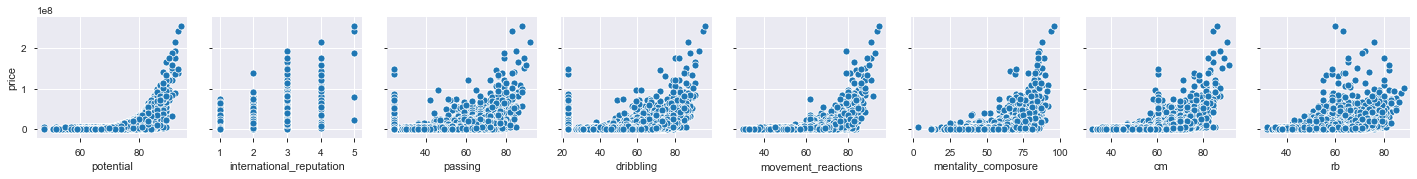

In [69]:
########### checking linear relationships with y ##########################
sns.pairplot(X_train_temp, x_vars = ['potential','international_reputation','passing',
                         'dribbling','movement_reactions','mentality_composure',
                         'cm','rb'], y_vars = ['price'])

In [70]:
Xnew_train = X_train_temp.drop(['price'],axis=1)
ynew_train = X_train_temp['price']

Xnew_val = X_val_temp.drop(['price'],axis=1)
ynew_val = X_val_temp['price']

In [71]:
Xnew_test = X_test_temp.drop(['price'],axis=1)
ynew_test = X_test_temp['price']

In [72]:
Xnew_train.head()

,potential,international_reputation,passing,dribbling,movement_reactions,mentality_composure,cm,rb,attack_rate_Low,attack_rate_Medium,Pos_Defender,Pos_Goal-Keeper,Pos_Mid-Fielder,Pos_Not-Played,Pos_Rest,Pos_Substitute,nation_Others,club_new_Others,rating
2163,81,1,71.0,77.0,62.0,62.0,71.0,62.0,0,1,0,0,0,0,0,1,0,1,1
11355,66,1,61.0,65.0,60.0,62.0,61.0,52.0,0,1,0,0,0,0,0,1,0,1,0
9616,66,1,64.0,68.0,67.0,52.0,67.0,55.0,0,0,0,0,1,0,0,0,1,1,0
11011,71,1,53.0,56.0,60.0,62.0,59.0,62.0,0,1,0,0,0,0,0,1,1,1,0
12156,69,1,58.0,68.0,66.0,52.0,58.0,49.0,0,1,0,0,0,0,1,0,1,1,0


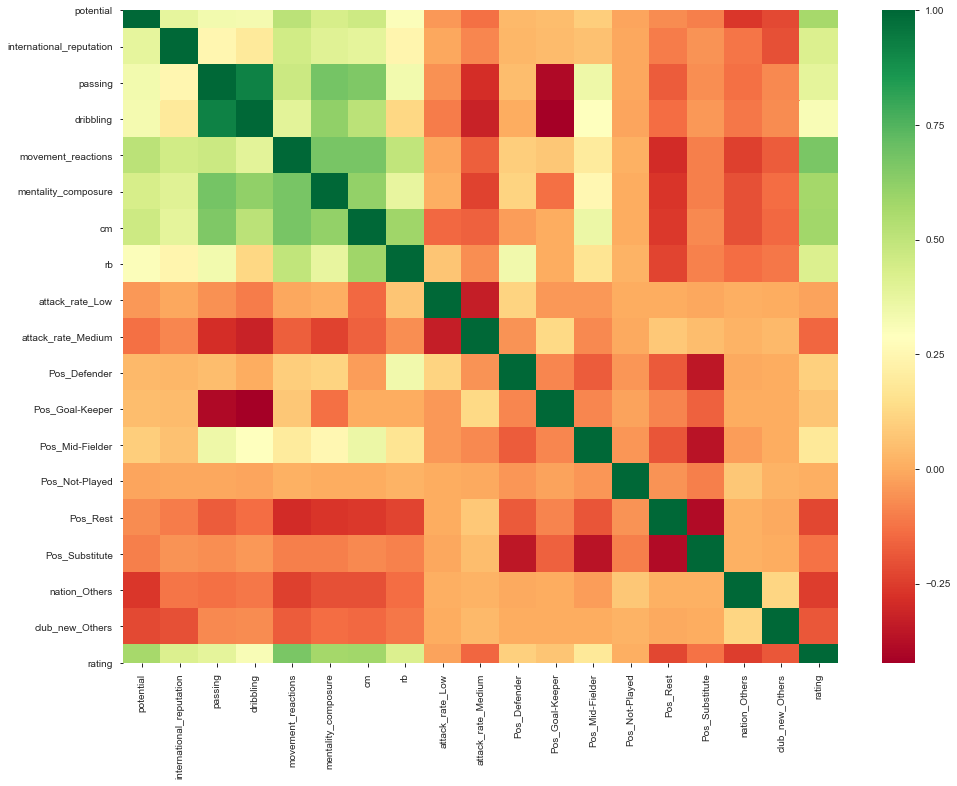

In [73]:
####### correlation
cor_mat = Xnew_train.corr()
cor_mat.to_csv(directory+'cor_mat2.csv')
plt.figure(figsize=(16,12))
sns.heatmap(cor_mat, cmap='RdYlGn')

In [74]:
################# getting same significant variables here as well ##################

R square train data 0.5457501135217113
R square val data 0.5538065938413803
R square test data 0.5483219778936392


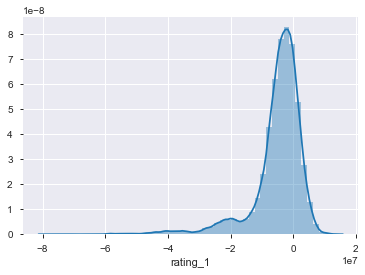

In [75]:
# linear regression 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xnew_train,ynew_train)
predictions = lm.predict(Xnew_train)
predictions_v = lm.predict(Xnew_val)
predictions_t = lm.predict(Xnew_test) 

print('R square train data', metrics.r2_score(ynew_train, lm.predict(Xnew_train)))
print('R square val data', metrics.r2_score(ynew_val, lm.predict(Xnew_val)))
print('R square test data', metrics.r2_score(ynew_test, lm.predict(Xnew_test)))
sns.distplot((y_test-lm.predict(Xnew_test)));

R square test data 0.548326080157283
R square train data 0.5457499206438203


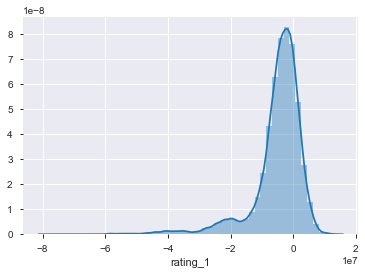

In [76]:
# linear regression 
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(Xnew_train,ynew_train)
predictions = lm.predict(Xnew_test) 

print('R square test data', metrics.r2_score(ynew_test, lm.predict(Xnew_test)))
print('R square train data', metrics.r2_score(ynew_train, lm.predict(Xnew_train)))
sns.distplot((y_test-lm.predict(Xnew_test)));

R square test data 0.5483219775288817
R square train data 0.5457501135217107
RMSE: 7.843916651622689
RMSE: 7.783444533595553


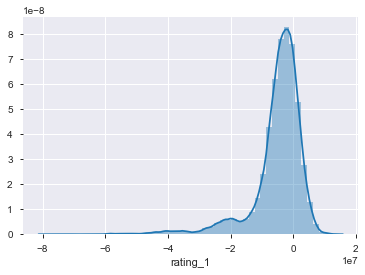

In [77]:
from sklearn.linear_model import Lasso
lm = Lasso(alpha =0.01)
lm.fit(Xnew_train,ynew_train)
predictions_t = lm.predict(Xnew_test)


print('R square test data', metrics.r2_score(ynew_test, lm.predict(Xnew_test)))
print('R square train data', metrics.r2_score(ynew_train, lm.predict(Xnew_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ynew_train, lm.predict(Xnew_train)))/1000000)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ynew_test, lm.predict(Xnew_test)))/1000000)
sns.distplot((y_test-lm.predict(Xnew_test)));

In [78]:
res = Xnew_test.copy()
res['residuals'] = ynew_test-predictions_t

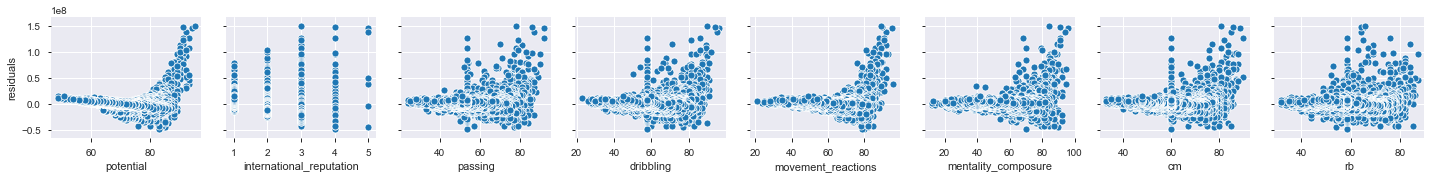

In [79]:
sns.pairplot(res, x_vars = ['potential','international_reputation','passing',
                         'dribbling','movement_reactions','mentality_composure',
                         'cm','rb'], y_vars = ['residuals'])

In [80]:
##### linearity assumption violated

In [81]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(Xnew_train,ynew_train.astype('int'))

predictions = dtree.predict(Xnew_train)
predictions_v = dtree.predict(Xnew_val)
predictions_t = dtree.predict(Xnew_test)

print('R square train data', metrics.r2_score(ynew_train, predictions))
print('R square train data', metrics.r2_score(ynew_val, predictions_v))
print('R square test data', metrics.r2_score(ynew_test, predictions_t))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ynew_train, predictions))/1000000)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ynew_val, predictions_v))/1000000)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ynew_test, predictions_t))/1000000)

R square train data 0.9999777658278696
R square train data 0.6125704727830004
R square test data 0.6395620039134351
RMSE: 0.054877717324489456
RMSE: 7.408978386813797
RMSE: 6.953006548988812


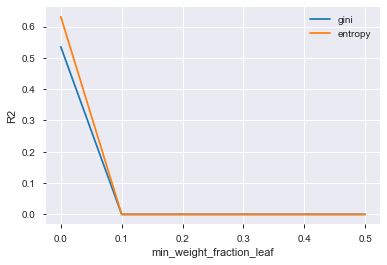

In [82]:
g = [0,0.1,0.2,0.3,0.4,0.5]

max_depth = []
acc_gini = []
acc_entropy = []

for i in g:
 dtree = DecisionTreeClassifier(criterion='gini', min_weight_fraction_leaf=i )
 dtree.fit(Xnew_train, ynew_train.astype('int'))
 pred = dtree.predict(Xnew_val)
 acc_gini.append(metrics.r2_score(ynew_val, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy',min_weight_fraction_leaf=i)
 dtree.fit(Xnew_train, ynew_train.astype('int'))
 pred = dtree.predict(Xnew_val)
 acc_entropy.append(metrics.r2_score(ynew_val, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'min_weight_fraction_leaf':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('min_weight_fraction_leaf','acc_gini', data=d, label='gini')
plt.plot('min_weight_fraction_leaf','acc_entropy', data=d, label='entropy')
plt.xlabel('min_weight_fraction_leaf')
plt.ylabel('R2')
plt.legend()

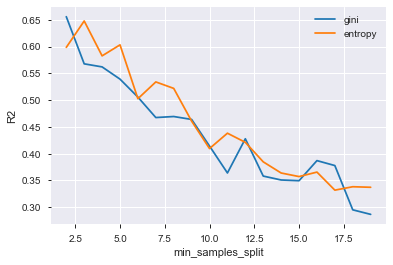

In [83]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(2,20,1):
 dtree = DecisionTreeClassifier(criterion='gini', min_samples_split=i )
 dtree.fit(Xnew_train, ynew_train.astype('int'))
 pred = dtree.predict(Xnew_val)
 acc_gini.append(metrics.r2_score(ynew_val, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy',min_samples_split=i)
 dtree.fit(Xnew_train, ynew_train.astype('int'))
 pred = dtree.predict(Xnew_val)
 acc_entropy.append(metrics.r2_score(ynew_val, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'min_samples_split':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('min_samples_split','acc_gini', data=d, label='gini')
plt.plot('min_samples_split','acc_entropy', data=d, label='entropy')
plt.xlabel('min_samples_split')
plt.ylabel('R2')
plt.legend()

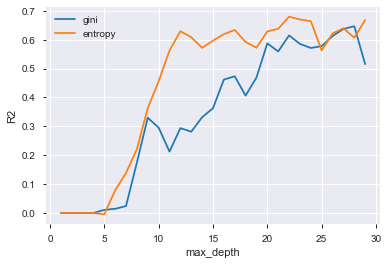

In [84]:
from sklearn.metrics import accuracy_score
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini',max_depth=i )
 dtree.fit(Xnew_train, ynew_train.astype('int'))
 pred = dtree.predict(Xnew_val)
 acc_gini.append(metrics.r2_score(ynew_val, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(Xnew_train, ynew_train.astype('int'))
 pred = dtree.predict(Xnew_val)
 acc_entropy.append(metrics.r2_score(ynew_val, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('R2')
plt.legend()

In [85]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',min_weight_fraction_leaf=0,min_samples_split=3,max_depth=15,random_state=42)
dtree.fit(Xnew_train,ynew_train.astype('int'))

predictions = dtree.predict(Xnew_train)
predictions_v = dtree.predict(Xnew_val)
predictions_t = dtree.predict(Xnew_test)

print('R square train data', metrics.r2_score(ynew_train, predictions))
print('R square val data', metrics.r2_score(ynew_val, predictions_v))
print('R square test data', metrics.r2_score(ynew_test, predictions_t))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ynew_train, predictions))/1000000)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ynew_val, predictions_v))/1000000)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ynew_test, predictions_t))/1000000)

R square train data 0.8569404066770593
R square val data 0.6927204147983378
R square test data 0.7077336263918181
RMSE: 4.401939300042235
RMSE: 6.598250867550306
RMSE: 6.261044358058966


In [86]:
##################### Strategy to pick top 50 variabes ########################
Xnew_test['cost_to_investor'] = predictions_t

In [87]:
az = Xnew_test.loc[Xnew_test['rating'] == 1,].sort_values('cost_to_investor', ascending = False)

In [88]:
az['cost_to_investor'].count()

5276

In [89]:
az['bucket'] = pd.qcut(az['cost_to_investor'].values,170,duplicates='drop')

In [90]:
az.groupby('bucket').cost_to_investor.agg(['count','min','median','max','sum']).reset_index().sort_values(['bucket'],ascending=False).head(20)

,bucket,count,min,median,max,sum
153,"(85800000.0, 165380000.0]",29,93396000,109600000,165380000,3.457716e+09
152,"(73940000.0, 85800000.0]",25,74400000,85560000,85800000,2.031148e+09
151,"(65860000.0, 73940000.0]",39,66764000,72640000,73940000,2.777488e+09
150,"(60706352.941, 65860000.0]",32,60720000,63960000,65860000,2.052224e+09
149,"(51112000.0, 60706352.941]",29,53052000,56360000,60604000,1.625460e+09
148,"(45537647.059, 51112000.0]",33,45640000,47364000,51112000,1.588064e+09
147,"(40205411.765, 45537647.059]",31,40240000,43260000,45060000,1.319120e+09
146,"(36876000.0, 40205411.765]",30,36992000,38924000,40072000,1.164392e+09
145,"(35640000.0, 36876000.0]",30,35888000,36386000,36876000,1.089476e+09
144,"(34367058.824, 35640000.0]",33,34380000,35156000,35640000,1.158128e+09
